# Table of Content

- <a href='#Introduction'> 1. Introduction </a>
- <a href='#Libs'> 2. Importing Libraries </a>
- <a href='#Data_reading'> 3. Data reading </a>
- <a href='#data_cleaning'> 4. Data cleaning </a>
    - <a href='#missing_values'> 4.1 Handling missing values </a>
    - <a href='#removing_duplicates'> 4.2 Removing duplicates </a>
    - <a href='#data_types'> 4.3 Checking data types </a>
    - <a href='#new_column'> 4.4 New column </a>
- <a href='#plotting_functions'> 5. Plotting functions </a>
    - <a href='#normalized_stacked_plot'> 5.1 normalized_stacked_plot </a>
    - <a href='#grouped_bar_chart'> 5.2 grouped_bar_chart </a>
    - <a href='#histogram'> 5.3 histogram </a>
    - <a href='#horizontal_bar_chart'> 5.4 horizontal_bar_chart </a>
- <a href='#visualization'> 6. Data Visualization </a>
    - <a href='#customer_status'> 6.1 Customer status </a>
    - <a href='#demographic'> 6.2 Demographic Information </a>
    - <a href='#customer_account_category'> 6.3 Customer Account Information - Categorical Variables </a>
    - <a href='#customer_account_numerical'> 6.4 Customer Account Information - Numerical Variables </a>
    - <a href='#customer_services'> 6.5 Customer Services Information </a>
- <a href='#data_analysis'> 7. Data Analysis </a>
    - <a href='#question1'> 7.1 How many customers joined the company during the last quarter? </a>
    - <a href='#question2'> 7.2 What are top 10 cities with the highest customer churn? </a>
    - <a href='#question3'> 7.3 What seem to be the key drivers of customer churn? </a>
    - <a href='#question4'> 7.4 Is the company losing high value customers? </a>
        - <a href='#customer_value'> 7.4.1 Customer's value </a>
        - <a href='#risk_factors'> 7.4.2 Risk Factors </a>
    - <a href='#customer_characteristics'> 7.5 What customer characteristics have the most impact on customer churn? </a>
    - <a href='#question6'> 7.6 What is the customer profile for a customer that churned, joined, and stayed? Are they different? </a>
- <a href='#conclusion'> 8. Conclusion and reccomendation </a>

<a id='Introduction'></a>
# 1.Introduction

**Customer churn** is a common issue in the **telecommunications industry**, where customers switch to competitors or discontinue using the services offered by a particular telecom company. This can have a significant impact on the company's revenue and market share. In order to address this issue, telecom companies use advanced analytics and machine learning techniques to predict and prevent customer churn. By analyzing customer data and behavior, these companies can gain insights into the reasons behind customer churn and develop strategies to retain their existing customers. Such strategies may include offering personalized plans, improving customer service, or providing incentives for long-term contracts. By implementing these strategies effectively, telecom companies can reduce customer churn and enhance their reputation, ultimately leading to increased revenue and market share.

In this project, we will analyze data of a fictional California-based Telecommunications company. The objective is to help the company **improve retention by identifying high value customers and churn risks**, which leads to increasing customer satisfaction and corporation revenue.

### **The data set**

The data set used in this project is part of **Maven Analytics** challenge and it is available on their [website](https://mavenanalytics.io/).

They also provided a **Recommended Analysis:**

    1.How many customers joined the company?
    2.What is the customer profile for a customer that churned, joined, and stayed? Are they different?
    3.What seem to be the key drivers of customer churn?
    4.Is the company losing high value customers? If so, how can they retain them?

This data set consists of 39 columns that includes details about demographics, location, services, and current status of 7,043 customers. **Customer Status** indicates the status of the customer at the end of the **fiscal quarter** (Q2 2022): *Churned*, *Stayed*, or *Joined*. For churned customers is also provided the **Churn Category** and **Churn Reason**.

Let's roll up our sleeves and dive into the beauty of data analysis! :-)

<a id='Libs'></a>
# 2. Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
%matplotlib inline 

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)

# Setting this option will print all rows of a dataframe
pd.set_option('display.max_rows', None)

<a id='Data_reading'></a>
# 3. Data reading

In [3]:
df_telco = pd.read_csv("telecom_customer_churn.csv")

In [5]:
df_telco.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

For easier data anlysis, let's check **unique values of each column**, so we know what kind of data and values we may expect.

In [7]:
# unique values of each column

print(f"\033[1mColumn name:", "\033[0m Values")
print("--------------------------------------------------------")
for column in df_telco.columns:
    print(f"\033[1m" + column + ":", "\033[0m", df_telco[column].unique())    

Column name:  Values
--------------------------------------------------------
Customer ID:  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Gender:  ['Female' 'Male']
Age:  [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 72 79 26 30 22 34 42 64 48
 28 33 31 60 69 20 57 19 38 54 35 51 66 61 24 55 59 71 49 40 21 45 29 62
 76 77 73 41 56 80 63 53 44 70 74 36 27 65]
Married:  ['Yes' 'No']
Number of Dependents:  [0 3 1 2 4 6 5 9 7 8]
City:  ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley']
Zip Code:  [93225 91206 92627 ... 91934 93013 95956]
Latitude:  [34.827662 34.162515 33.645672 ... 32.649787 34.441398 39.937017]
Longitude:  [-118.999073 -118.203869 -117.922613 ... -116.2237   -119.513163
 -121.058043]
Number of Referrals:  [ 2  0  1  3  8  9 10  5  4  7  6 11]
Tenure in Months:  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33

<a id='data_cleaning'></a>
# 4. Data Cleaning

**Data cleaning** is the process of identifying and removing errors, inconsistencies, inaccuracies, and redundancies in a dataset. The importance of clean and accurate data cannot be overstated, as it serves as a reliable foundation for modeling, trend analysis, pattern recognition, and any other data-driven processes.

Data cleaning involves a series of tasks and techniques, including **handling missing values, removing duplicates, correcting inaccuracies** (errors, typos and others), **data transformation** (converting into a suitable format) and many more. 

In [5]:
df_telco.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

<a id='missing_values'></a>
## 4.1 Handling missing values

We can see that the *NaN* values of columns related to the internet services are caused by *"No"* value of **Internet Service** column.  Therefore we will replace all these *Nan* values by *"No Internet Service"*.

As the **Avg Monthly GB Download** is numerical, we will replace *NaN* by *0*.

In [6]:
no_internet_service_filter = df_telco["Internet Service"] == "No"
internet_columns = ["Internet Service","Avg Monthly GB Download","Internet Type", "Online Security", "Online Backup", "Device Protection Plan", 
                    "Premium Tech Support", "Streaming TV", "Streaming Movies", "Streaming Music", "Unlimited Data"]
df_telco[internet_columns][no_internet_service_filter].head(5)

,Internet Service,Avg Monthly GB Download,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
20,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# replacing NaN values
for column in internet_columns:
    if column == "Avg Monthly GB Download":
        df_telco[column] = df_telco[column].replace(np.nan, 0)
    else:
        df_telco[column] = df_telco[column].replace(np.nan, "No Internet Service")

<br>
<br>

We can see that there is the similar situation for columns **Phone Service, Avg Monthly Long Distance Charges** and **Multiple Lines**:

In [8]:
no_phone_service_filter = df_telco["Phone Service"] == "No"
df_telco[["Phone Service", "Avg Monthly Long Distance Charges", "Multiple Lines"]][no_phone_service_filter].head(5)

,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines
10,No,NaN,NaN
14,No,NaN,NaN
16,No,NaN,NaN
19,No,NaN,NaN
25,No,NaN,NaN


In [9]:
# replacing the NaN values
df_telco["Multiple Lines"] = df_telco["Multiple Lines"].replace(np.nan, "No Phone Service")
df_telco["Avg Monthly Long Distance Charges"] = df_telco["Avg Monthly Long Distance Charges"].replace(np.nan, 0)

In [10]:
df_telco["Offer"] = df_telco["Offer"].replace(np.nan, "No Offer")

<a id='removing_duplicates'></a>
## 4.2 Removing duplicates

We can see that there are no duplicates:

In [11]:
df_telco.duplicated().sum()

0

<a id='data_types'></a>
## 4.3 Checking data types

In [12]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

<a id='new_column'></a>
## 4.4 New column

### Age Group

In [13]:
# categories:
    # 0-19
    # 20 <= x < 30 ... 20-29
    # 30-39
    # 40-49
    # 50-59
    # 60-69
    # 70-79
    # 80+

age_categories = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
bins= [0,20,30,40,50,60,70,80,150]
df_telco["Age Group"] = pd.cut(df_telco['Age'], bins=bins, labels=age_categories, right=False)

# changing the category to string (object)
df_telco["Age Group"] = df_telco["Age Group"].astype("str")

<a id='plotting_functions'></a>
# 5. Plotting functions

<a id='normalized_stacked_plot'></a>
# 5.1 normalized_stacked_plot

In [14]:
def normalized_stacked_plot(columns_to_plot):
    
    '''
    Prints a 100% stacked plot of the customer status for all the independent variables from the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of strings): Names of the variables to plot
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)
    titles=[]
    index = 1
    
    # create a list of all subplots titles
    for column in columns_to_plot:
        titles.append(f"Proportion of customers by {column}")
    
    # create a figure, plot grid
    fig = make_subplots(number_of_rows, number_of_columns, subplot_titles=titles)
    
    for column in columns_to_plot:
        # calculate the percentage of customers based on their status for each independent variable
        data = pd.crosstab(df_telco[column], df_telco['Customer Status'], normalize="index")
        data.T
        
        # set showlegend = True only for the first subplot
        if index == 1:
            showlegend = True
        else:
            # hiding legend items
            showlegend = False
        
        # set the column for each subplot
        if index % 2 == 0:
            col = 2
        else:
            col = 1
        
        #set the row for each subplot
        row = math.ceil(index/2)
    
        # 100% stacked bar chart 
        fig.add_trace(go.Bar(x=data.index, y=data['Churned'], name='Churned', marker_color = 'red', showlegend = showlegend), row=row, col=col)
        fig.add_trace(go.Bar(x=data.index, y=data['Joined'], name='Joined', marker_color = 'orange', showlegend = showlegend), row=row, col=col)
        fig.add_trace(go.Bar(x=data.index, y=data['Stayed'], name='Stayed', marker_color = 'green', showlegend = showlegend), row=row, col=col)
        index = index+1

    
    fig.update_layout(barmode='stack',
                     plot_bgcolor="white",
                     width = 500*number_of_columns,
                     height = 500*number_of_rows
                     )
    # set the width of bars
    fig.update_traces(width=0.5)
    fig.show()

<a id='grouped_bar_chart'></a>
## 5.2 grouped_bar_chart


In [15]:
def grouped_bar_chart(categories, column):
   
    '''
    Prints grouped bar chart of the customer status for the independent variable
            Parameters:
                    categories (list): Values from this list are used to position marks along the x axis in cartesian coordinates.
                    column (string): Name of the column to plot
        
            Returns:
                    None
    '''
    import itertools
    statuses = ["Stayed", "Churned", "Joined"]
    colors = ["green", "red", "orange"]
    
    fig = go.Figure()
    
    # grouped bar chart
    for (status, color) in zip(statuses, colors):
        fig.add_trace(go.Bar(
        x=categories,
        y=df_telco[df_telco["Customer Status"]==status].groupby(column)["Customer ID"].count(),
        name=status,
        marker_color=color
        ))   
    
    fig.update_layout(
        plot_bgcolor="white",
        title=f"Customers distribution by {column}",
        title_x=0.5,
        xaxis_title='',
        yaxis_title='Frequency',
        barmode='group',
        xaxis_tickangle=-45
    )
    fig.show()

<a id='histogram'></a>
## 5.3 histogram

In [16]:
def histogram(column):
    '''
    Prints probability histogram of the customer status with respect to the provided column
            Parameters:
                    column (string): Name of the column to plot
        
            Returns:
                    None
    '''
    fig = px.histogram(df_telco, 
                       x=column,histnorm='probability density', 
                       color="Customer Status", 
                       color_discrete_map={'Stayed':'green', 'Churned':'red', 'Joined':'orange'}, 
                       title=f"Customers distribution by {column}")
    fig.update_layout(
        plot_bgcolor="white",
        title_x=0.5)
    fig.show()

<a id='horizontal_bar_chart'></a>
## 5.4 horizontal_bar_chart

In [17]:
def horizontal_bar_chart(df, title, height):
    '''
    Prints horizontal bar chart of provided dataframe
            Parameters:
                    df (Pandas DataFrame): Name of the dataframe to plot
                    title (String): Title of plot
                    height (int, float): Desired height of plot
        
            Returns:
                    None
    '''

    fig = px.bar(df,
                 orientation='h',
                 title=title,
                 color_discrete_sequence=["midnightblue"],
                 text_auto=True)
    fig.update_layout(
        height=height,
        width = 800,
        plot_bgcolor="white",
        title_x=0.5,
        xaxis_title='Number of customers',
        yaxis_title='',
        showlegend=False,
    )

    fig.show()

<a id='visualization'></a>
# 6. Data Visualization

<a id='customer_status'></a>
## 6.1 Customer status

The following bar plot shows the percentage of customers that correspond to each class of the **Customer status**: *Joined, Stayed* and *Churned*. As shown below, this is an imbalanced data set because the classes are not equally distributed among all customers, being *Stayed* the majority class. 

Therefore we are going to use **normalized stacked bar plots** to analyze the influence of each categorical variable towards the customer status. For numeric variables we are going to use **grouped bar charts** and **histograms**. 

In [ ]:
# proportions of customers based on their status
prop_cust_status = df_telco['Customer Status'].value_counts(normalize=True)

fig = px.bar(prop_cust_status,  color=["green", "red", "orange"],
            color_discrete_map="identity",
            text_auto='.2%')
fig.update_layout(
    width = 900,
    height = 600,
    plot_bgcolor="white",
    title='Proportions of customers based on their status',
    title_x=0.5,
    xaxis_title='',
    yaxis_title='',
    barmode='stack',
)
fig.update_traces(textfont_size=12,textposition="outside")
fig.show()

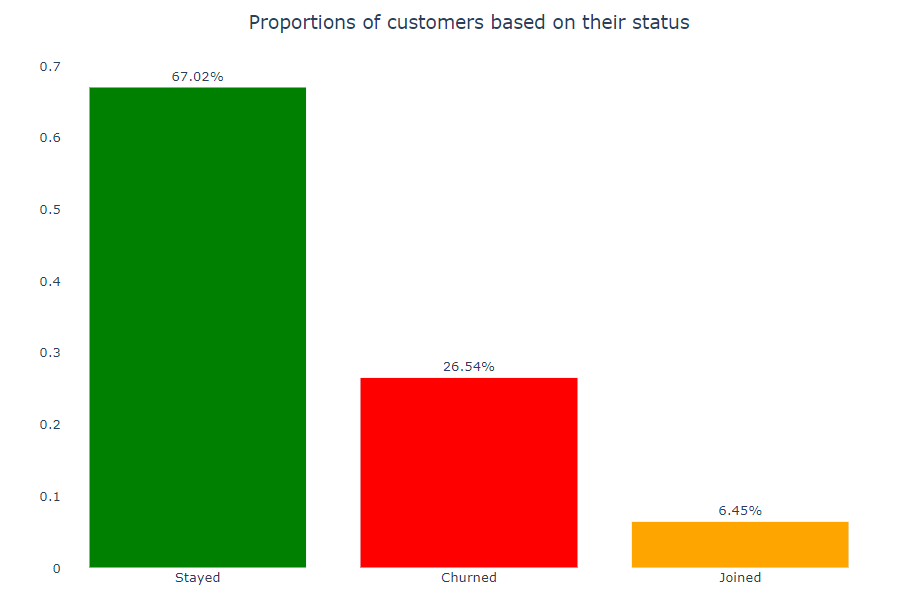

<a id='demographic'></a>
## 6.2 Demographic Information

In [ ]:
# demographic column names - categorical
demographic_columns = ['Gender', 'Married']

# stacked plot of demographic columns
normalized_stacked_plot(demographic_columns)

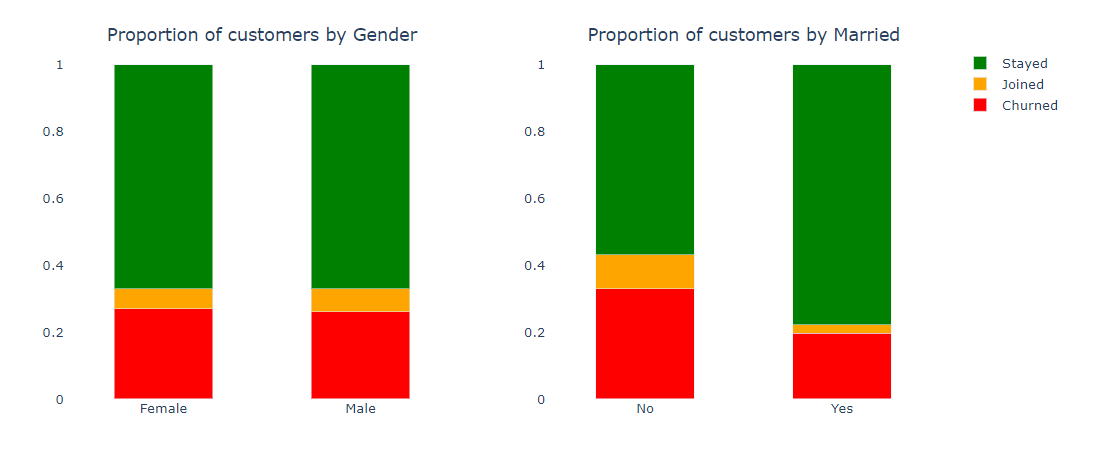

In [ ]:
# grouped bar chart for Age
age_categories = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
grouped_bar_chart(age_categories, "Age Group")

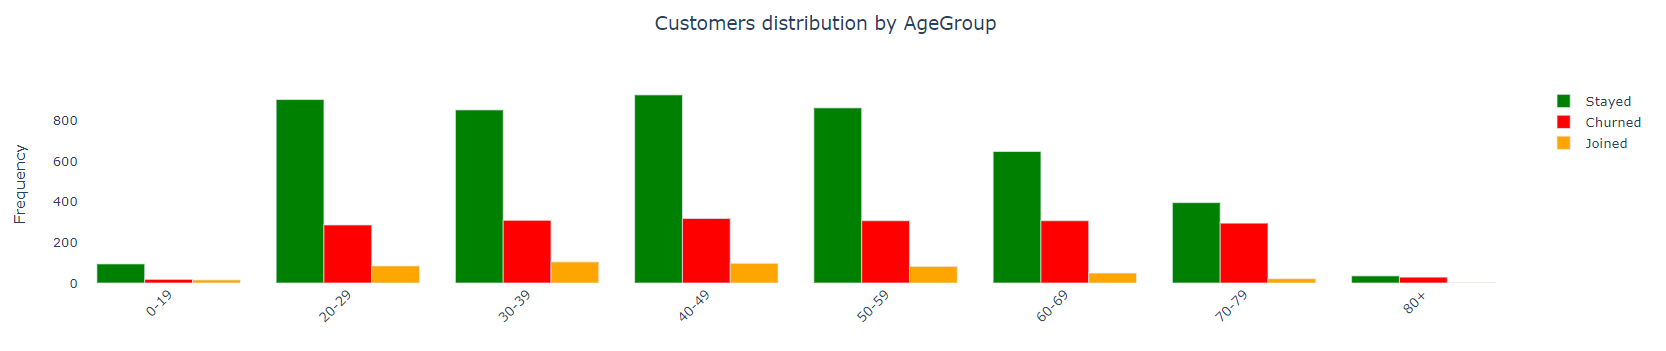

In [ ]:
# grouped bar chart for Number of Dependents
dependents_categories = df_telco["Number of Dependents"].unique()
dependents_categories.sort()
grouped_bar_chart(dependents_categories, "Number of Dependents")

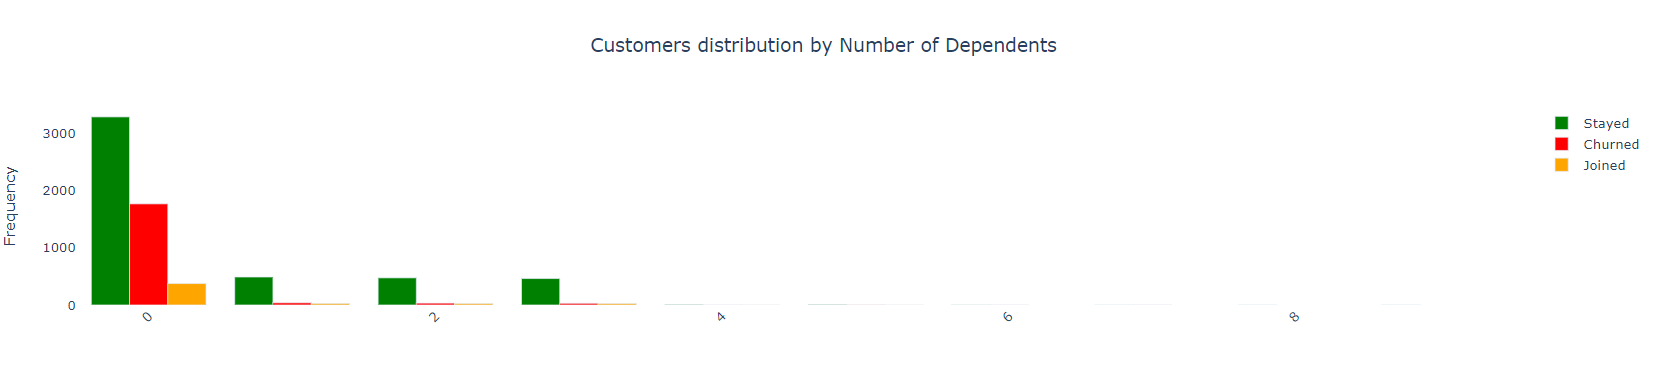

We can extract the following **conclusions** by analyzing demographic attributes:
* **Gender has no significant predictive power.** The churn rates of women and men are very similar. 
* **Married customers churn almost twice less then unmarried customers**
* **Customers with 0 dependents are very likely to churn**
* Customers who **joined** the company are very likely to be **unmarried** and **in productive age** (20-60 years old) with **no dependents**

<a id='customer_account_category'></a>
## 6.3 Customer Account Information - Categorical Variables

In [ ]:
# customer account information column names
account_columns = ['Contract', 'Paperless Billing', 'Payment Method', 'Offer']

# stacked plot of customer account information columns
normalized_stacked_plot(account_columns)

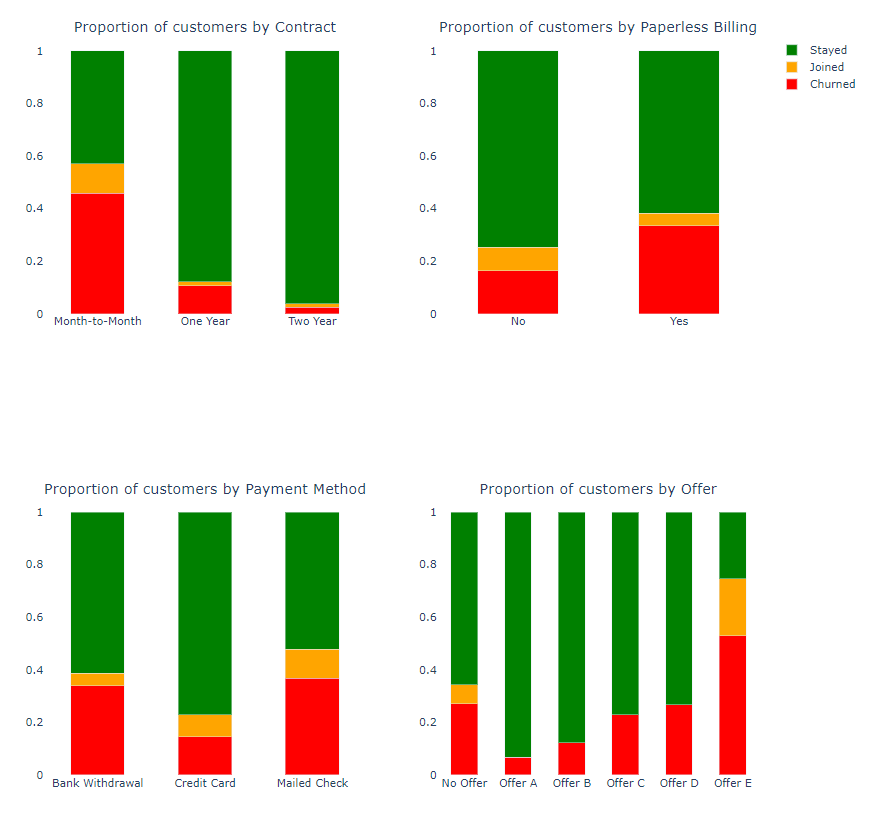

We can extract the following **conclusions** by analyzing customer account attributes:
* **Customers with month-to-month contracts have higher churn rates** compared to clients with yearly contracts.
* **Customers subscribed to paperless billing churn more** than those who are not subscribed.
* **Customers who opted for an credit card as paying method are twice less likely to leave the company.**
* **Customers with offer E are more likely to churn** the company compared to the customers with different type of offer.
* Most **new customers** choose **month-to-month** contract and **offer E**. 

<a id='customer_account_numerical'></a>
## 6.4 Customer Account Information - Numerical Variables

In [ ]:
histogram("Tenure in Months")

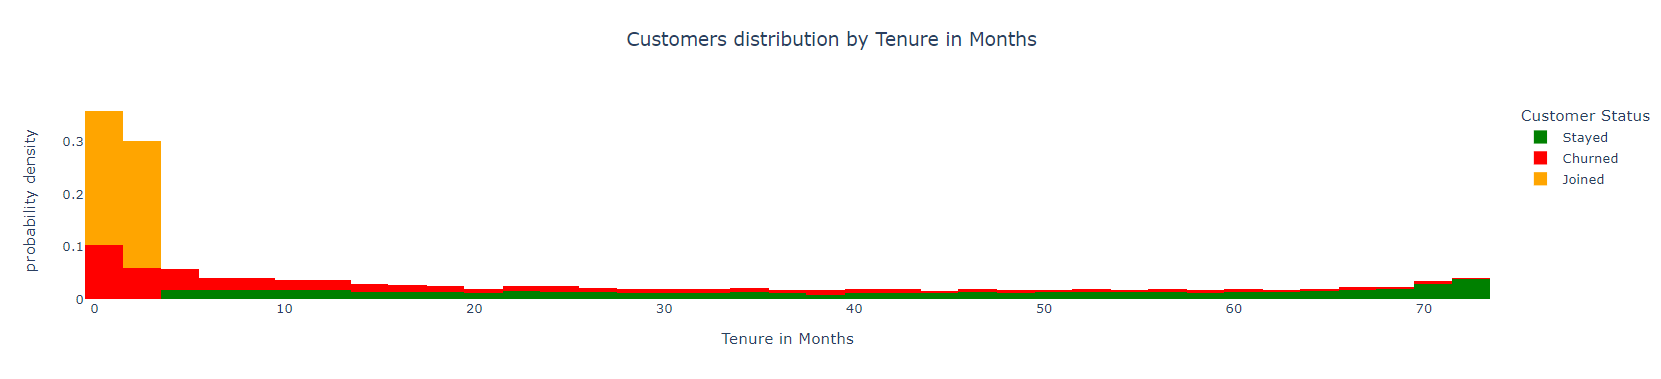

In [ ]:
histogram("Monthly Charge")

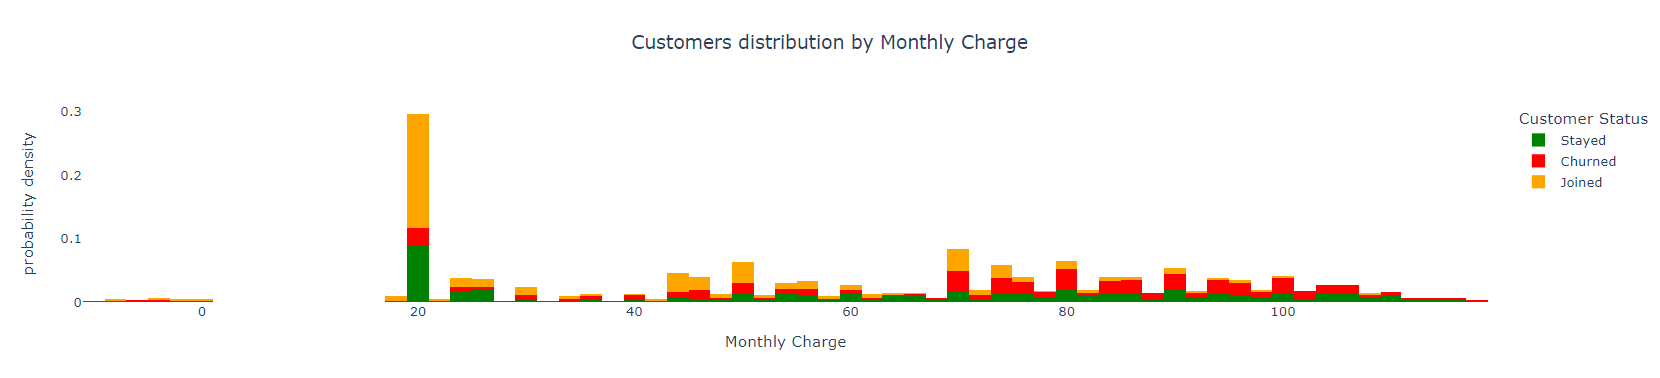

In [ ]:
histogram("Total Charges")

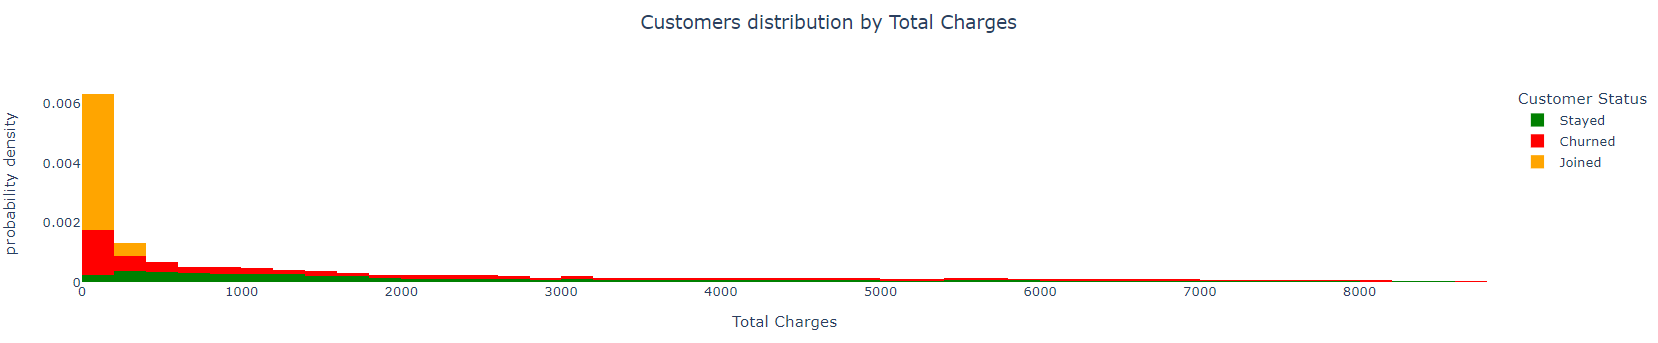

We can extract the following **conclusions** by analyzing the histograms above:

* **New customers** ( with low tenure) are more **likely to churn.**
* The **churn** rate tends to be larger when **monthly charges are high**.
* Clients with **low total charges** are **more likely to leave** the company.

<a id='customer_services'></a>
## 6.5 Customer Services Information

In [ ]:
# services column names
services_columns = ['Phone Service','Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']

# stacked plot of services columns
normalized_stacked_plot(services_columns)

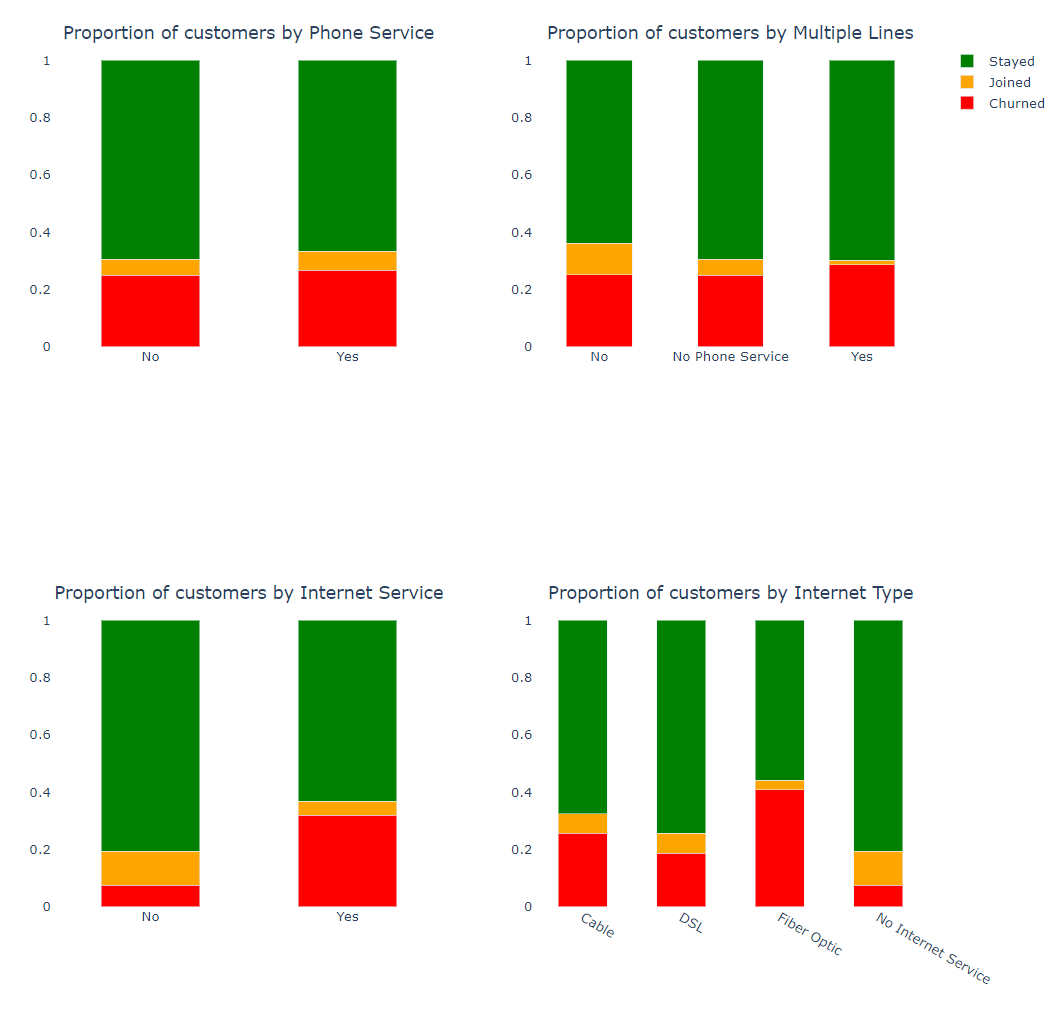

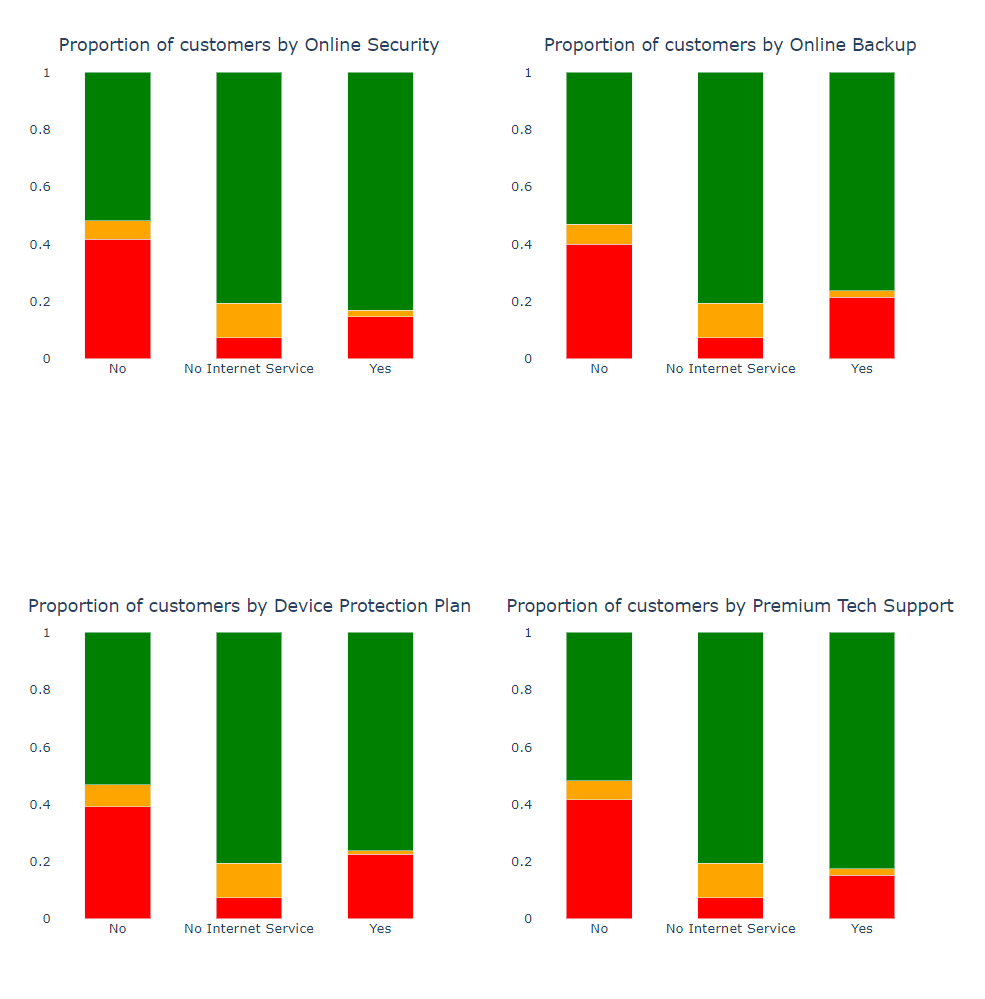

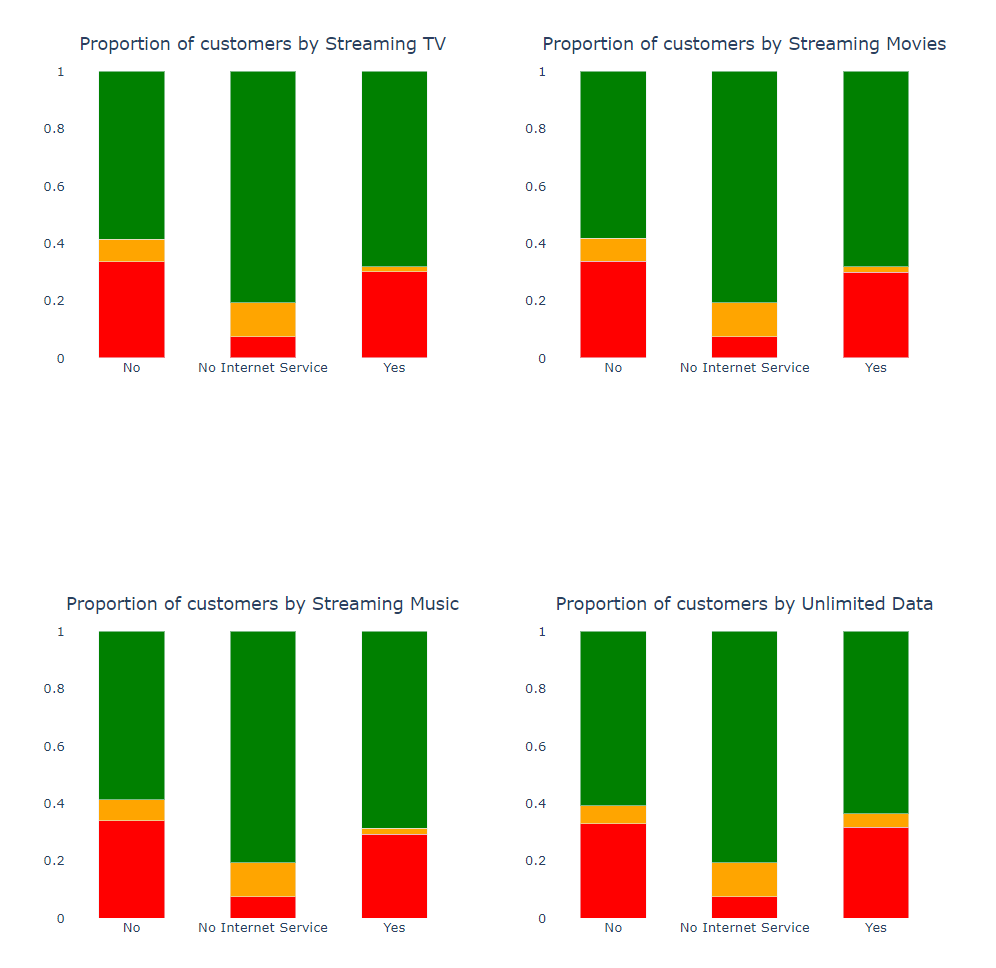

We can extract the following **conclusions** by evaluating services attributes:

* We **do not expect phone attributes** (PhoneService and MultipleLines) to **have significant predictive power**. The percentage of churn for all classes in both independent variables are nearly the same.
* Customers with **online security and online backup churn less** than those without it.
* Customers with **no tech support and protection plan tend to churn more often** than those with them.
* **Newly joined customers** tend to choose **no internet service** 

<a id='data_analysis'></a>
# 7. Data Analysis

In this section we are going to:
 - analyze the key reasons of customer churn, 
 - find top 10 cities with the highest customer churn,
 - describe customer profiles for different type of customers (churned, joined, and stayed)
 - and many more
 
For this, we are going to create a new dataframe **df_churned** that include only customers who have churned the company.

In [27]:
# dataframe that includes only churned customers
df_churned = df_telco[df_telco['Customer Status']=='Churned']
df_churned['Customer Status'].value_counts()

Customer Status
Churned    1869
Name: count, dtype: int64

<a id='question1'></a>
## 7.1 How many customers joined the company during the last quarter?

We can see that **454 new customers joined** the company during the last quarter.

In [28]:
df_telco["Customer Status"].value_counts()

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

<a id='question2'></a>
## 7.2 What are top 10 cities with the highest customer churn?

In [29]:
cities = df_churned.groupby("City")["Customer ID"].count().to_frame("Churned customers").sort_values(['Churned customers'], ascending=False).head(10)

In [ ]:
# ascending sorting for nicer visualization
horizontal_bar_chart(df = cities.sort_values(['Churned customers'], ascending=True), title='Top 10 cities with the highest customer churn', height = 400)

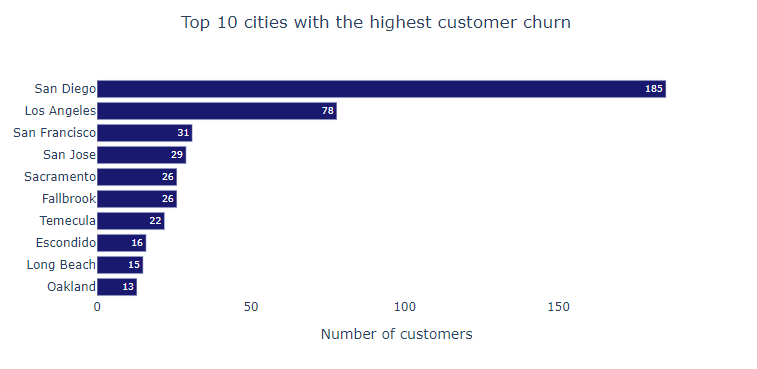

<a id='question3'></a>
## 7.3 What seem to be the key drivers of customer churn?

In [31]:
churn_key_drivers = df_churned.groupby("Churn Reason")["Customer ID"].count().to_frame("Churned customers").sort_values(["Churned customers"], ascending=False).head(10)

In [ ]:
horizontal_bar_chart(df = churn_key_drivers.sort_values(['Churned customers'], ascending=True), title='Top 10 key reasons of customer churn', height = 400)

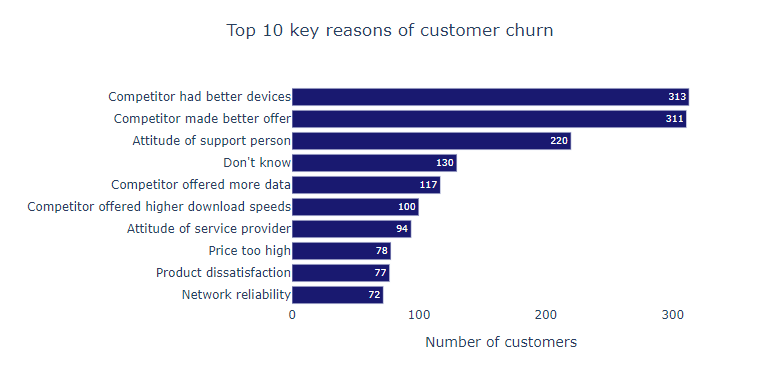

In [33]:
churn_categories = df_churned.groupby("Churn Category")["Customer ID"].count().to_frame("Churned customers").sort_values(["Churned customers"], ascending=False).head(5)

In [ ]:
horizontal_bar_chart(df = churn_categories.sort_values(['Churned customers'], ascending=True), title='Top 5 churn categories', height = 400)

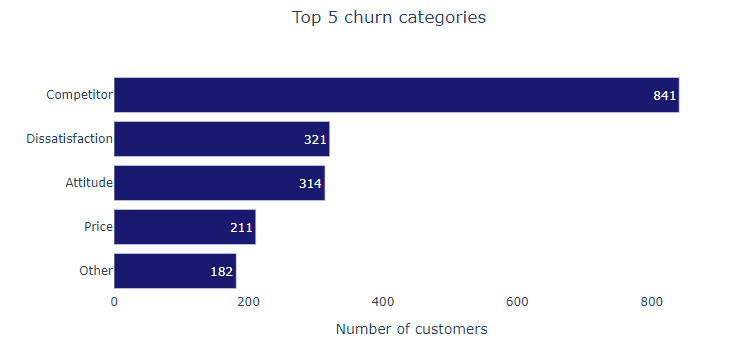

<a id='question4'></a>
## 7.4 Is the company losing high value customers?

<a id='customer_value'></a>
### 7.4.1 Customer's value

How to measure the value of customer? When looking across the variables, there are several that might be associate with *value*:

* **Number of Referrals** – the number of new clients added by a specific customer to the company's network 
* **Tenure in Months** – a measure of customer's loyalty, how long the customer has stayed within the company 
* **Monthly Charge** – customer's monthly charge 
* **Total Charge** – customer's total quarterly charge 
* **Total Revenue** – the revenue that the company has received from the customer (from their entire tenure) 

For the evaluation of customer's value, we are going to use **Number of Referrals**, **Tenure in Months** and **Monthly Charge**. We haven't chosen **Total Charge** and **Total Revenue** for the following reasons:
* Total Charge is measured quarterly. As there are customers that only joined the company in the last month or two, their value might be evaluated lower than others. 
* Total Revenue indicates the revenue that the company has received from the customer from their **entire tenure**. Therefore it may happen that we can find the loyal customer (with high tenure and low monthly charges) who has the same revenue as the newly joined customer (with low tenure and high montly charges). From a long-term point of view their revenue is not the same and therefore it is better to consider the monthly charges when evaluating the customer's value. 

We will also split the allowance between the variables in order of our perceived importance as: 
**Customer Value = 70% of Monthly Charge + 20% of Tenure in Months + 10% of Number of Referrals**

Except of that, we are going to use **Min-max Normalisation**, one of the common method for data rescaling which transforms the original range of features to the values between 0 and 1 using following [formula](https://www.wallstreetmojo.com/normalization-formula/):

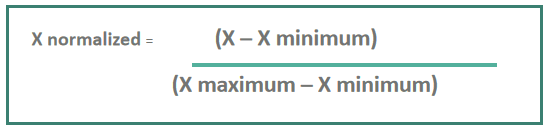

In [35]:
def normalization(x, x_min, x_max):
    
    '''
    Returns normalized value of x based on the formula above
            Parameters:
                    x (float, Numpy array or Pandas Series) : value, Numpy array or Pandas Series to be normalized
                    x_min (float) 
                    x_max (float)
            Returns:
                    Normalized value
    '''
    
    return (x-x_min)/(x_max-x_min)

In [36]:
# evaluation of customer value
df_telco["Customer Value"] = 0.7*df_telco["Monthly Charge"] + 0.2*df_telco["Tenure in Months"] + 0.1*df_telco["Number of Referrals"]
# normalization of customer value
df_telco["Normalized Customer Value"] = df_telco["Customer Value"].apply(normalization, args=(df_telco["Customer Value"].min(), df_telco["Customer Value"].max()))

In [52]:
df_telco['Normalized Customer Value'].describe()

count    7043.000000
mean        0.554820
std         0.225170
min         0.000000
25%         0.359501
50%         0.578980
75%         0.735290
max         1.000000
Name: Normalized Customer Value, dtype: float64

In [ ]:
# churn rate based on the customer's value
histogram("Normalized Customer Value")

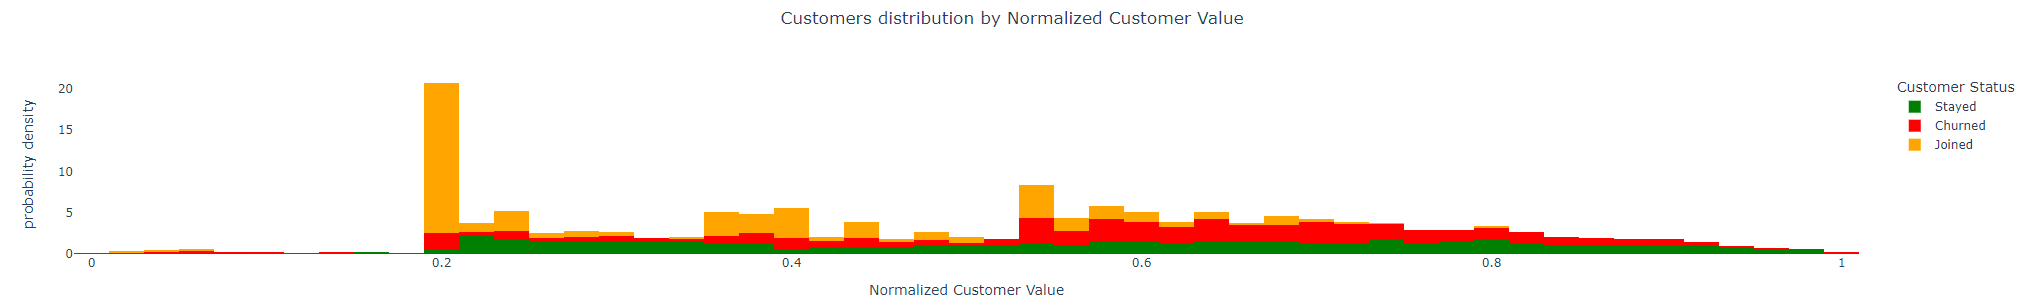

According to the plot above, we can come to the conclusion that **customers with higher value are likely to churn**. 

We can also consider the customer to be **high valued customer**, if his normalized value is greater than 0.554820 (the **mean**).

<a id='risk_factors'></a>
### 7.4.2 Risk Factors

#### Approach

In this section we are going to use a little bit more complex metric that includes more variables (**risk factors**) which have an **impact on customer churn**. This metric is again the **normalization of the sum of variables** and the values used are the average values from the average churn:stay ratio. 

Let's see an example:

 - According to the calculation below, the split between churn and stay clients, is approximately 26% churn to 67% stay.
 
   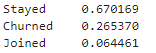
   
 - If we examine different variables we will see the deviations from this value. For example, if we examine the contract type, we can see that the churn:stay ratio of customers with Month-to-Month contracts is approximately 46%:43%. This represents a deviation of 20% (= 26% - 46%) from the average value and suggests Month-to-Month contracts as a significant factor in churn.
 
    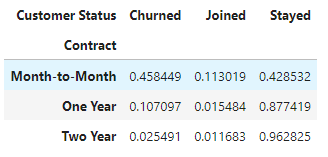
 
 - We can see that the same for One and Two Year contracts suggests the opposite:
        
        Month-to-Month = 26% – 46% = –20%
        One Year = 26% – 11% = +15%
        Two Year = 26% – 3% = +23%                    
        
    
 - **The greater the negative value, the greater the likelihood that the variable contributes to the churn risk**.

#### Process of computation

**Step 1** :  consider columns stored in **risk_factor_columns** list, for each column create a variable which contains **calculated churned % values**

**Step 2** :  update each variable - **substitute** the churned % values as deviations from the 26% average as follows: prop_cust_status['Churned'] - x = 0.2654 - x

**Step 3** : for each customer, **sum the deviations** over all variables with respect to the customer's characteristics and store it in new column **Churn Risk**

**Step 4** : **normalize** the values stored in Churn Risk column

In [38]:
risk_factor_columns = ['Married','Age Group', 'Number of Dependents','Number of Referrals', 'Tenure in Months', 'Offer', 'Internet Service', 
                       'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 
                       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']

In [39]:
# step 1

# creating new variables : married, age_group, number_of_dependents, number_of_referrals, ... which contains churned % values
risk_factors = []
print("Following variables were created: ")
print("-------------------")
for column in risk_factor_columns:
    risk_factor = column.lower().replace(" ", "_")
    # computes frequency table normalized over each row (each row divide by the sum of values)
    globals()[risk_factor] = pd.crosstab(df_telco[column], df_telco['Customer Status'], normalize="index")['Churned']
    risk_factors.append(risk_factor)
    print(vars()[risk_factor])
    print("-------------------")

Following variables were created: 
-------------------
Married
No     0.329580
Yes    0.196649
Name: Churned, dtype: float64
-------------------
Age Group
0-19     0.141732
20-29    0.224490
30-39    0.244076
40-49    0.236960
50-59    0.245208
60-69    0.305777
70-79    0.414326
80+      0.439394
Name: Churned, dtype: float64
-------------------
Number of Dependents
0    0.325517
1    0.068716
2    0.062147
3    0.058027
4    0.111111
5    0.200000
6    0.333333
7    0.500000
8    0.000000
9    0.000000
Name: Churned, dtype: float64
-------------------
Number of Referrals
0     0.325831
1     0.466851
2     0.110169
3     0.125490
4     0.076271
5     0.079545
6     0.036199
7     0.024194
8     0.009390
9     0.016807
10    0.000000
11    0.000000
Name: Churned, dtype: float64
-------------------
Tenure in Months
1     0.619902
2     0.516807
3     0.470000
4     0.471591
5     0.481203
6     0.363636
7     0.389313
8     0.341463
9     0.386555
10    0.354331
11    0.313131
12    0.

In [40]:
# step 2

# UPDATE of variables 
# every value above (x) will be updated as follows:  prop_cust_status['Churned'] - x = 0.2654 - x

#print("UPDATE")
#print("-------------------")
for factor in risk_factors:
    vars()[factor] = prop_cust_status['Churned'] - vars()[factor]
#    print(vars()[factor])
#    print("-------------------")

In [41]:
print(risk_factors)

['married', 'age_group', 'number_of_dependents', 'number_of_referrals', 'tenure_in_months', 'offer', 'internet_service', 'internet_type', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method']


In [42]:
print(risk_factor_columns)

['Married', 'Age Group', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']


In [43]:
# step 3

# churn risk metric
lst=[] 

for index, customer in df_telco.iterrows():
    churn_risk = 0
    for (factor, column) in zip(risk_factors, risk_factor_columns):
        # sum the deviations over all variables with respect to the customer's characteristics 
        churn_risk = churn_risk + vars()[factor][customer[column]]

    lst.append(churn_risk)
    
df_telco["Churn Risk"] = lst
del lst

In [44]:
# step 4

# normalization of churn risk values
df_telco["Normalized Churn Risk"] = df_telco["Churn Risk"].apply(normalization, args=(df_telco["Churn Risk"].min(), df_telco["Churn Risk"].max()))

In [53]:
df_telco["Normalized Churn Risk"].describe()

count    7043.000000
mean        0.407454
std         0.238777
min         0.000000
25%         0.214014
50%         0.361612
75%         0.554962
max         1.000000
Name: Normalized Churn Risk, dtype: float64

### Re-categorization of customers

Now, we are going to re-categorise the Joined and Stayed customer status based on normalized values. If the normalized value was greater than  0.554962 (**75th quantile** of df_telco["Normalized Churn Risk"]), then it is likely that customers will remain and be **“safe”**. However, if it is less than  0.554962 there is a higher risk that the customer will churn and would therefore classify as **“@ risk”**.

In [45]:
# function for recategorization
def status_risk(status, churn_risk, value ):
    if status == "Stayed" and churn_risk < value:
        return "Stayed @ risk"
    
    elif status == "Stayed" and churn_risk >= value:
        return "Stayed safe"
    
    elif status == "Joined" and churn_risk < value:
        return "Joined @ risk"
    
    elif status == "Joined" and churn_risk >= value:
        return "Joined safe"
    
    else: return status

In [46]:
# recategorization of customers 
lst=[]
for index, customer in df_telco.iterrows():
    status = status_risk(customer["Customer Status"], customer["Normalized Churn Risk"], df_telco["Normalized Churn Risk"].quantile(q=0.75))
    lst.append(status)
    
df_telco["Status Risk"] = lst
del lst

In [47]:
df_telco["Status Risk"].value_counts()

Status Risk
Stayed @ risk    3245
Churned          1869
Stayed safe      1475
Joined @ risk     275
Joined safe       179
Name: count, dtype: int64

In [ ]:
# visualization of customers based on their value and churn risk

fig = px.scatter(df_telco, x="Normalized Churn Risk",y="Normalized Customer Value", color='Status Risk', width=1200, height=1000, color_discrete_map={'Stayed @ risk':'green', 'Churned':'red', 'Joined @ risk':'orange', 'Stayed safe':'mediumseagreen','Joined safe':'gold'})
fig.add_vline(x=df_telco["Normalized Churn Risk"].quantile(q=0.75), line_width=3, line_dash="dash", line_color="black")
fig.add_hline(y=df_telco["Normalized Customer Value"].mean(), line_width=3, line_dash="dash", line_color="black")
fig.add_annotation(text="Higher value", xref="paper", yref="paper", x=1, y=df_telco["Normalized Customer Value"].mean() + 0.02, showarrow=False)
fig.add_annotation(text="Lower value", xref="paper", yref="paper", x=1, y=df_telco["Normalized Customer Value"].mean() - 0.03, showarrow=False)
fig.add_annotation(text="Higher churn risk", xref="paper", yref="paper", y=1, x=df_telco["Normalized Churn Risk"].quantile(q=0.75) - 0.12, showarrow=False)
fig.add_annotation(text="Lower churn risk", xref="paper", yref="paper", y=1, x=df_telco["Normalized Churn Risk"].quantile(q=0.75) + 0.08, showarrow=False)
fig.update_yaxes(range=(-0.05,1.05))
fig.update_xaxes(range=(-0.05,1.05))
fig.update_layout(plot_bgcolor="white")
fig.show()

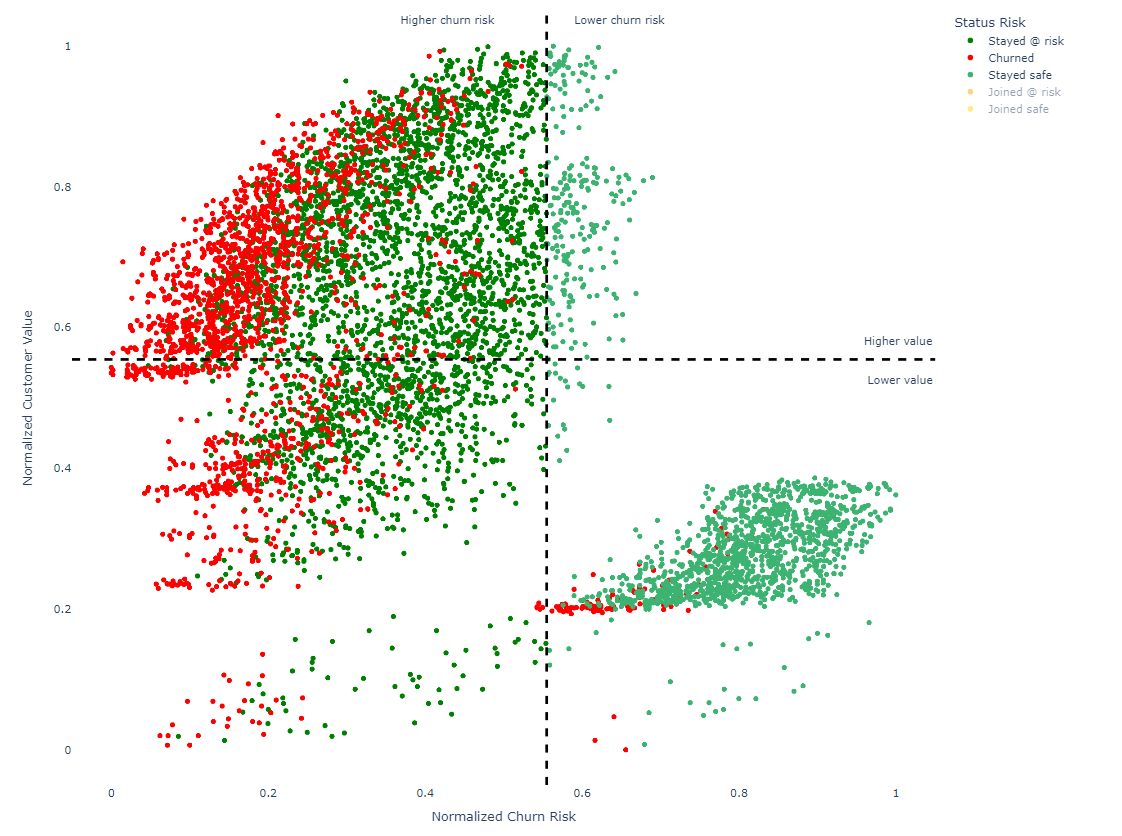

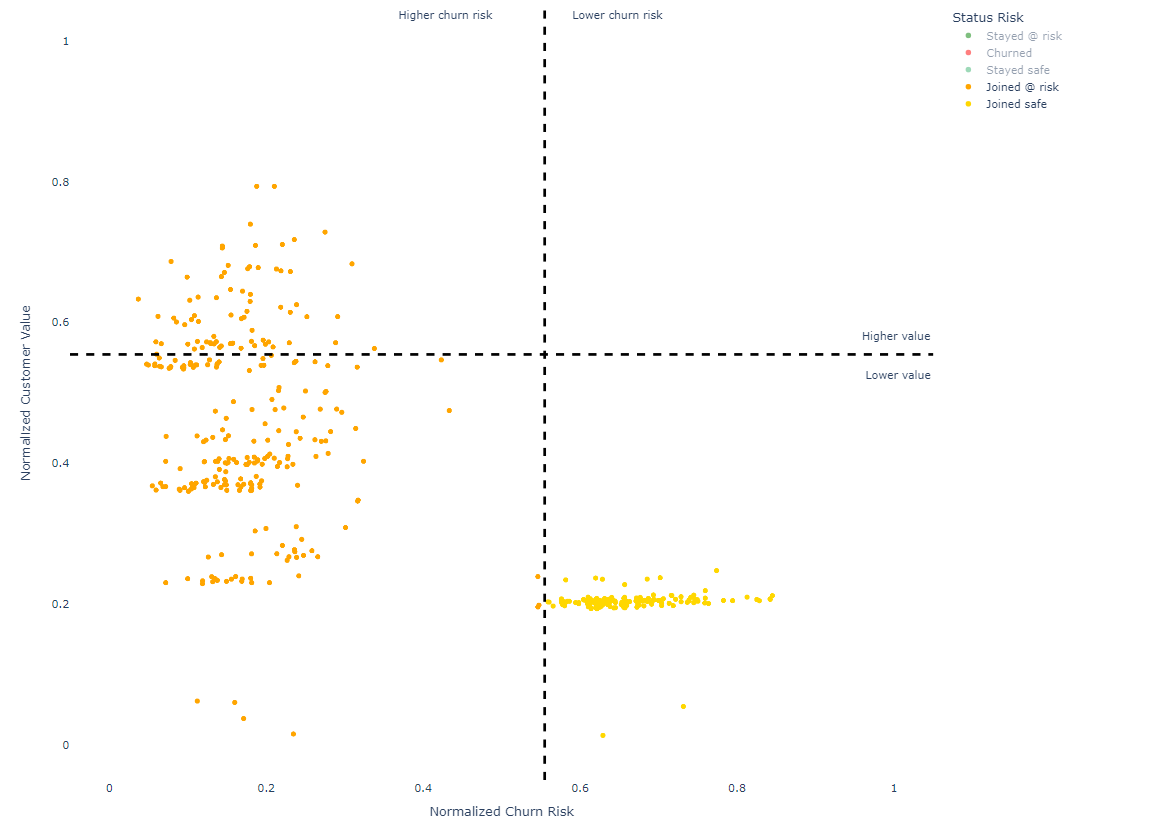

<a id='customer_characteristics'></a>
## 7.5 What customer characteristics have the most impact on customer churn?

In this section we are going to find top 15 churn customer characteristics, those which cause **low value of Normalized Churn Risk**. In other words, they have the most impact on churn.

In [55]:
print(risk_factor_columns)

['Married', 'Age Group', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method']


In [56]:
# create empty pandas.Series
customer_characteristics = pd.Series(dtype='int64')
for column in risk_factor_columns:
    df = df_churned[column].value_counts()
    # renaming the indexes  -  it adds the name of column to the index - for distinguish among the variables
    # example for Married: No ---> Married | No
    #                      Yes ---> Married | Yes
    df.rename(lambda index: f"{column} | {index} ", inplace=True)
    # vertical concatenation of pandas.Series
    customer_characteristics = pd.concat([customer_characteristics, df], axis=0)

# sorting all values in descending order
customer_characteristics = customer_characteristics.sort_values(ascending=False).head(15)

In [ ]:
horizontal_bar_chart(df = customer_characteristics.sort_values(ascending=True), title='Top 15 customer churn characteristics', height = 600)

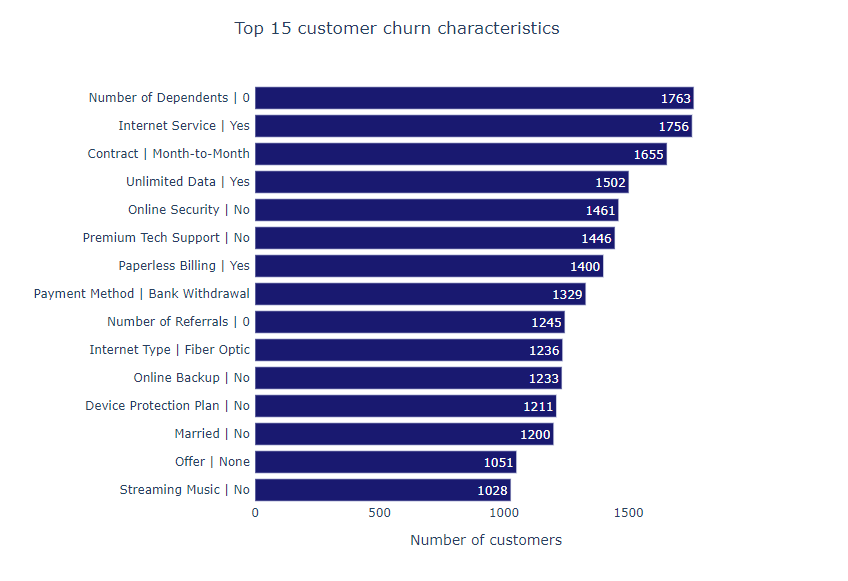

<a id='question6'></a>
## 7.6 What is the customer profile for a customer that churned, joined, and stayed? Are they different?

In this section we are going to describe customer profile based on their status. For each category, we are going to compute:

- number of accounts belonging to that category
- % of total accounts
- total monthly charge
-  % of total monthly charge
- total revenue
- % of total revenue

Before that, we are going to mark each customer as **High value** or **Low value** based on their *numerical value* computed above.

In [58]:
def customer_value_category(value):
    
    '''
    Returns customer value category based on provided customer's numerical value
            Parameters:
                    value (float) : customer's numerical value
            Returns:
                    Customer Value Category (String): {High value, Low value}
    '''
        
    if value >= df_telco["Normalized Customer Value"].mean():
        return "High value"
    else:
        return "Low value"

df_telco["Customer Value Category"] = df_telco["Normalized Customer Value"].apply(customer_value_category)

In [59]:
#number of accounts for category
customer_counts = df_telco.groupby(["Status Risk", "Customer Value Category"])["Customer ID"].count().unstack(1).replace(np.nan, 0)
customer_counts

Customer Value Category,High value,Low value
Status Risk,,
Churned,1225.0,644.0
Joined @ risk,73.0,202.0
Joined safe,0.0,179.0
Stayed @ risk,2286.0,959.0
Stayed safe,220.0,1255.0


In [60]:
# % of total accounts 
customer_counts_percent = customer_counts/len(df_telco)
customer_counts_percent

Customer Value Category,High value,Low value
Status Risk,,
Churned,0.173932,0.091438
Joined @ risk,0.010365,0.028681
Joined safe,0.000000,0.025415
Stayed @ risk,0.324578,0.136164
Stayed safe,0.031237,0.178191


In [61]:
# total monthly charge for category 
total_monthly_charges = df_telco.groupby(["Status Risk", "Customer Value Category"])["Monthly Charge"].sum().unstack(1).replace(np.nan, 0)
total_monthly_charges

Customer Value Category,High value,Low value
Status Risk,,
Churned,109130.7,27955.95
Joined @ risk,6034.4,9831.30
Joined safe,0.0,3554.60
Stayed @ risk,201132.9,44657.00
Stayed safe,19116.5,26494.20


In [62]:
# average monthly charge for category
avg_monthly_charges = df_telco.groupby(["Status Risk", "Customer Value Category"])["Monthly Charge"].mean().unstack(1).replace(np.nan, 0)
avg_monthly_charges

Customer Value Category,High value,Low value
Status Risk,,
Churned,89.086286,43.409860
Joined @ risk,82.663014,48.669802
Joined safe,0.000000,19.858101
Stayed @ risk,87.984646,46.566215
Stayed safe,86.893182,21.110916


In [63]:
# total monthly charge
total_monthly_charge = df_telco["Monthly Charge"].sum()

# % of total monthly charge
total_monthly_charges_percent = total_monthly_charges / total_monthly_charge
total_monthly_charges_percent

Customer Value Category,High value,Low value
Status Risk,,
Churned,0.243646,0.062415
Joined @ risk,0.013472,0.021949
Joined safe,0.000000,0.007936
Stayed @ risk,0.449050,0.099701
Stayed safe,0.042680,0.059151


In [64]:
# total revenue for category
total_revenues= df_telco.groupby(["Status Risk", "Customer Value Category"])["Total Revenue"].sum().unstack(1).replace(np.nan, 0)
total_revenues

Customer Value Category,High value,Low value
Status Risk,,
Churned,3350016.89,334442.93
Joined @ risk,16916.08,24810.28
Joined safe,0.00,12553.39
Stayed @ risk,12127239.83,1655462.69
Stayed safe,1638151.89,2211537.71


In [65]:
# % of total revenue
total_revenue = df_telco["Total Revenue"].sum()

# % of total monthly charge
total_revenues_percent = total_revenues / total_revenue
total_revenues_percent

Customer Value Category,High value,Low value
Status Risk,,
Churned,0.156754,0.015649
Joined @ risk,0.000792,0.001161
Joined safe,0.000000,0.000587
Stayed @ risk,0.567459,0.077463
Stayed safe,0.076653,0.103482


In [66]:
# output
print("                                   CUSTOMER PROFILES                         ")
print("")
for status in ['Churned', 'Stayed @ risk', 'Stayed safe', 'Joined @ risk', 'Joined safe']:
    print(f"{status}:                              High value                  Low value")
    print("--------------------------------------------------------------------------------------------")
    print("Customers:                           {a} ({p1:.0%})                   {b} ({p2:.0%})"
          .format(a=int(customer_counts['High value'][status]), b=int(customer_counts['Low value'][status]), p1=customer_counts_percent['High value'][status], p2=customer_counts_percent['Low value'][status]) )
    print("Total Monthly Charges:               {a} ({p1:.0%})              {b} ({p2:.0%})"
          .format(a=total_monthly_charges['High value'][status], b=total_monthly_charges['Low value'][status], p1=total_monthly_charges_percent['High value'][status], p2=total_monthly_charges_percent['Low value'][status]) )
    print("Average Charges:                        {a:.1f}                        {b:.1f}"
          .format(a=avg_monthly_charges['High value'][status], b=avg_monthly_charges['Low value'][status] ) )
    print("Total Revenue:                     {a} ({p1:.0%})             {b} ({p2:.0%})"
          .format(a=total_revenues['High value'][status], b=total_revenues['Low value'][status], p1=total_revenues_percent['High value'][status], p2=total_revenues_percent['Low value'][status]) )
    print(" ")
    print(" ")

                                   CUSTOMER PROFILES                         

Churned:                              High value                  Low value
--------------------------------------------------------------------------------------------
Customers:                           1225 (17%)                   644 (9%)
Total Monthly Charges:               109130.7 (24%)              27955.95 (6%)
Average Charges:                        89.1                        43.4
Total Revenue:                     3350016.89 (16%)             334442.93 (2%)
 
 
Stayed @ risk:                              High value                  Low value
--------------------------------------------------------------------------------------------
Customers:                           2286 (32%)                   959 (14%)
Total Monthly Charges:               201132.9 (45%)              44657.0 (10%)
Average Charges:                        88.0                        46.6
Total Revenue:                     1212

<a id='conclusion'></a>
# 8. Conclusion and recommendation

The analysis of customer churn shows that the most transitional customers are those with month-to-month contract, fiber optic internet, unlimited data, no offers and few additional services.
There is a lot high value customers who stayed at risk, therefore there is a high potential of churn in the future.

When approaching stayed and newly joined customers, following should be considered:
- suggest to change month-to-month contract to yearly based contract
- offer some additional services (security, premium technical support etc.) at reduced rates
- improve the network reliability by using better devices and solving the issues with fiber optic internet
- increase the limit of download speed
- improve the attitude of support persons (may include employee training, enhacement of customer communication etc. )

## Exporting the dataset

Now, we are going to export the dataset that will be used for customer's churn prediction. Before that, we will drop some columns that have low significance on customer churn (based the analysis done above).

In [120]:
#df_telco = df_telco.drop(columns=['Customer ID', 'Gender', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Phone Service', 'Multiple Lines', 'Churn Category', 'Churn Reason',
#       'Age Group', 'Customer Value', 'Normalized Customer Value', 'Churn Risk', 'Normalized Churn Risk', 'Status Risk', 'Customer Value Category'])

df_telco = df_telco.drop(columns=['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Category', 'Churn Reason',
       'Age Group', 'Customer Value', 'Normalized Customer Value', 'Churn Risk', 'Normalized Churn Risk', 'Status Risk', 'Customer Value Category'])

In [121]:
df_telco = df_telco[df_telco["Customer Status"]!='Joined']

In [122]:
df_telco.to_csv('churn.csv', index=False)